The objective of the following article is to obtain a step-by-step guide on building the `Seasonal Exponential Smoothing Method` using `SeasonalExponentialSmoothing()` with `Statsforecast`.

During this walkthrough, we will become familiar with the main `StatsForecast` class and some relevant methods such as `StatsForecast.plot`, `StatsForecast.forecast` and `StatsForecast.cross_validation` in other.

Let's start!!!

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[Seasonal Exponential Smoothing Model](#2)
3.	[Installing Statsforecast](#3)
4.	[Loading libraries and data](#4)
5.	[Explore Data with the plot method](#5)
6.	[Split the data into training and testing](#6)
7.	[Implementation of Theta with StatsForecast](#7)
8.	[Evaluate the model’s performance](#8)
9.	[Evaluate the model](#9)
10. [References](#10)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)

Simple Exponential Smoothing (SES) is a forecasting method that uses a weighted average of historical values to predict the next value. The weight is assigned to the most recent values, and the oldest values receive a lower weight. This is because SES assumes that more recent values are more relevant to predicting the future than older values.

SES is implemented by a simple formula:

$$\hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots, $$

The smoothing factor controls the amount of weight that is assigned to the most recent values. A higher α value means more weight will be assigned to newer values, while a lower α value means more weight will be assigned to older values.

Seasonality in time series refers to the regular, repeating pattern of variation in a time series over a specified period of time. 

Seasonality can be a challenge to deal with in time series analysis, as it can obscure the underlying trend in the data. 

Seasonality is an important factor to consider when analyzing time series data. By understanding the seasonal patterns in the data, it is possible to make more accurate forecasts and better decisions.

# **2. Seasonal Exponential Smoothing Model** <a class="anchor" id="2"></a>

[Table of Contents](#0)

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). This method is suitable for forecasting data with no clear trend or seasonal pattern.

Using the naïve method, all forecasts for the future are equal to the last observed value of the series,
$$\hat{y}_{T+h|T} = y_{T},$$

for $h=1,2,\dots $. Hence, the naïve method assumes that the most recent observation is the only important one, and all previous observations provide no information for the future. This can be thought of as a weighted average where all of the weight is given to the last observation.

Using the average method, all future forecasts are equal to a simple average of the observed data,
$$\hat{y}_{T+h|T} = \frac1T \sum_{t=1}^T y_t, $$

for $h=1,2,\dots $ Hence, the average method assumes that all observations are of equal importance, and gives them equal weights when generating forecasts.

We often want something between these two extremes. For example, it may be sensible to attach larger weights to more recent observations than to observations from the distant past. This is exactly the concept behind simple exponential smoothing. Forecasts are calculated using weighted averages, where the weights decrease exponentially as observations come from further in the past — the smallest weights are associated with the oldest observations:

\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   \tag{1}
\end{equation}

where $0 \le \alpha \le 1$ is the smoothing parameter. The one-step-ahead forecast for time $T+1$ is a weighted average of all of the observations in the series $y_1,\dots,y_T$. The rate at which the weights decrease is controlled by the parameter $\alpha$.

For any $\alpha$ between 0 and 1, the weights attached to the observations decrease exponentially as we go back in time, hence the name “exponential smoothing”. If $\alpha$ is small (i.e., close to 0), more weight is given to observations from the more distant past. If $\alpha$ is large (i.e., close to 1), more weight is given to the more recent observations. For the extreme case where $\alpha=1$, $\hat{y}_{T+1|T}=y_T$ and the forecasts are equal to the naïve forecasts.



## **2.1 How do you know the value of the seasonal parameter s?**

To determine the value of the seasonal parameter s in the Seasonally Adjusted `Simple Exponential Smoothing (SES Seasonally Adjusted) model`, different methods can be used, depending on the nature of the data and the objective of the analysis.

Here are some common methods to determine the value of the seasonal parameter $s$:

1. **Visual Analysis:** A visual analysis of the time series data can be performed to identify any seasonal patterns. If a clear seasonal pattern is observed in the data, the length of the seasonal period can be used as the value of $s$.

2. **Statistical methods:** Statistical techniques, such as autocorrelation, can be used to identify seasonal patterns in the data. The value of $s$ can be the number of periods in which a significant peak in the autocorrelation function is observed.

3. **Frequency Analysis:** A frequency analysis of the data can be performed to identify seasonal patterns. The value of $s$ can be the number of periods in which a significant peak in the frequency spectrum is observed. [see](https://robjhyndman.com/hyndsight/seasonal-periods/)

4. **Trial and error:** You can try different values of $s$ and select the value that results in the best fit of the model to the data.

It is important to note that the choice of the value of $s$ can significantly affect the `accuracy` of the seasonally adjusted SES model predictions. Therefore, it is recommended to test different values of $s$ and evaluate the performance of the model using appropriate evaluation measures before selecting the final value of $s$.

## **2.2 How can we validate the simple exponential smoothing model with seasonal adjustment?**

To validate the Seasonally Adjusted Simple Exponential Smoothing (SES Seasonally Adjusted) model, different theorems and evaluation measures can be used, depending on the objective of the analysis and the nature of the data.

Here are some common theorems used to validate the seasonally adjusted SES model:

1. Gauss-Markov Theorem: This theorem states that, if certain conditions are met, the least squares estimator is the best linear unbiased estimator. In the case of the seasonally adjusted SES, the model parameters are estimated using least squares, so the Gauss-Markov theorem can be used to assess the quality of model fit.

2. Unit Root Theorem: This theorem is used to determine if a time series is stationary or not. If a time series is non-stationary, the seasonally adjusted SES model is not appropriate, since it assumes that the time series is stationary. Therefore, the unit root theorem is used to assess the stationarity of the time series and determine whether the seasonally adjusted SES model is appropriate.

3. Ljung-Box Theorem: This theorem is used to assess the goodness of fit of the model and to determine if the model residuals are white noise. If the residuals are white noise, the model fits the data well and the model predictions are accurate. The Ljung-Box theorem is used to test whether the model residuals are independent and uncorrelated.

In addition to these theorems, various evaluation measures, such as root mean square error (MSE), mean absolute error (MAE), and coefficient of determination (R²), can be used to evaluate the performance of the seasonally adjusted SES model and compare it with other forecast models.

# **3. Installing Statsforecast** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

* using pip:

`pip install statsforecast`

* using with conda:

`conda install -c conda-forge statsforecast`

¡Warning!

We are constantly updating StatsForecast, so we suggest fixing the version to avoid issues. 

`pip install statsforecast=="1.0.0"`

# **4. Loading libraries and data** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

# 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

## **4.1 Read Data**

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/ads.csv")
df.head()

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2017-09-13T00:00:00,80115,1
1,2017-09-13T01:00:00,79885,1
2,2017-09-13T02:00:00,89325,1
3,2017-09-13T03:00:00,101930,1
4,2017-09-13T04:00:00,121630,1


In [5]:
df.tail()

,ds,y,unique_id
211,2017-09-21T19:00:00,155890,1
212,2017-09-21T20:00:00,123395,1
213,2017-09-21T21:00:00,103080,1
214,2017-09-21T22:00:00,95155,1
215,2017-09-21T23:00:00,80285,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         216 non-null    object
 1   y          216 non-null    int64 
 2   unique_id  216 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.2+ KB


We can see that our time variable `(ds)` is in an object format, we need to convert to a date format

In [7]:
# Convert to a datetime format
from datetime import datetime
df["ds"] = pd.to_datetime(df["ds"])

# **5. Explore Data with the plot method** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

In [8]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

In [38]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [ ]:
df["y"]=np.log(df["y"])

In [39]:
Augmented_Dickey_Fuller_Test_func(df["y"],'Ads')

Dickey-Fuller test results for columns: Ads
Test Statistic                -7.089634e+00
p-value                        4.444804e-10
No Lags Used                   9.000000e+00
Number of observations used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


## **5.1 Autocorrelation plots**

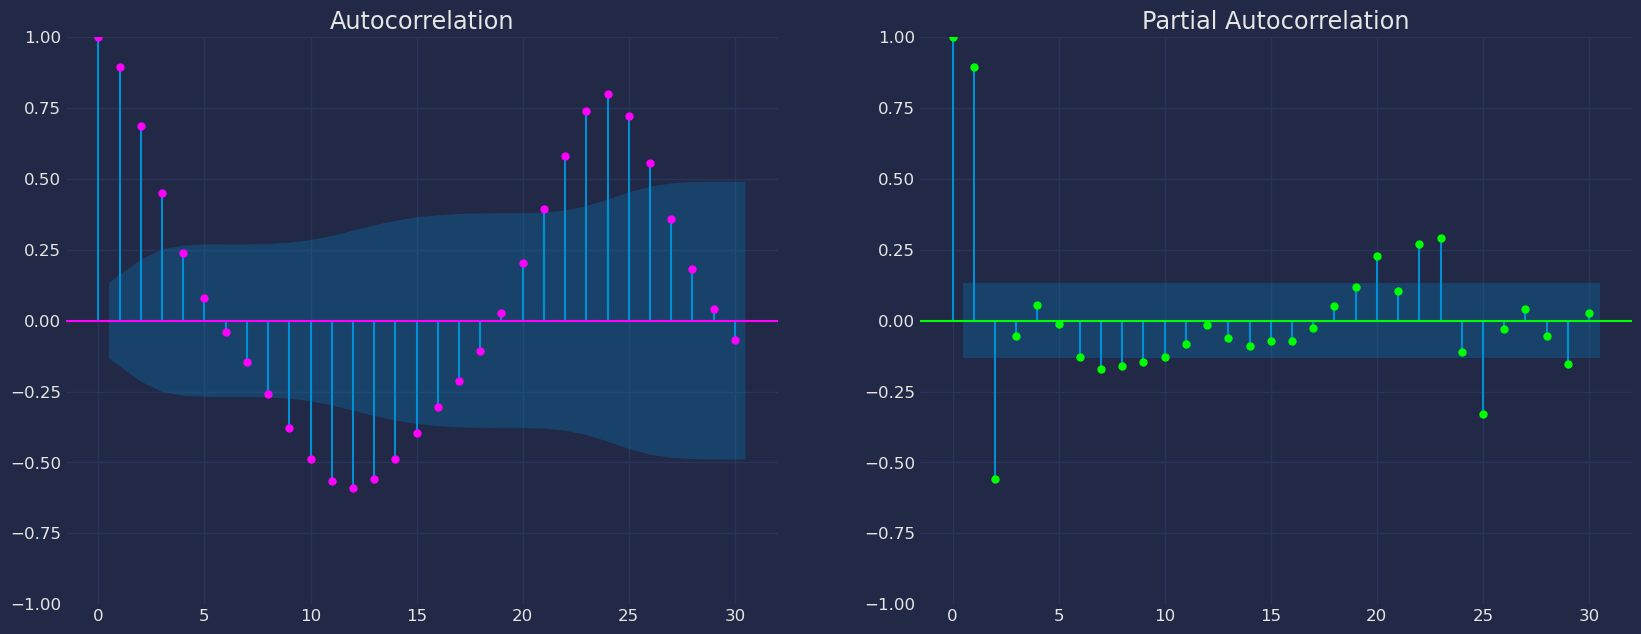

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

## **5.2 Decomposition of the time series**

How to decompose a time series and why?

In time series analysis to forecast new values, it is very important to know past data. More formally, we can say that it is very important to know the patterns that values follow over time. There can be many reasons that cause our forecast values to fall in the wrong direction. Basically, a time series consists of four components. The variation of those components causes the change in the pattern of the time series. These components are:

* **Level:** This is the primary value that averages over time.
* **Trend:** The trend is the value that causes increasing or decreasing patterns in a time series.
* **Seasonality:** This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
* **Residual/Noise:** These are the random variations in the time series.

Combining these components over time leads to the formation of a time series. Most time series consist of level and noise/residual and trend or seasonality are optional values.

If seasonality and trend are part of the time series, then there will be effects on the forecast value. As the pattern of the forecasted time series may be different from the previous time series.

The combination of the components in time series can be of two types:
* Additive
* multiplicative

Additive time series

If the components of the time series are added to make the time series. Then the time series is called the additive time series. By visualization, we can say that the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:
$$y(t) = level + Trend + seasonality + noise$$

## Multiplicative time series

If the components of the time series are multiplicative together, then the time series is called a multiplicative time series. For visualization, if the time series is having exponential growth or decline with time, then the time series can be considered as the multiplicative time series. The mathematical function of the multiplicative time series can be represented as.

$$y(t) = Level * Trend * seasonality * Noise$$

### Additive

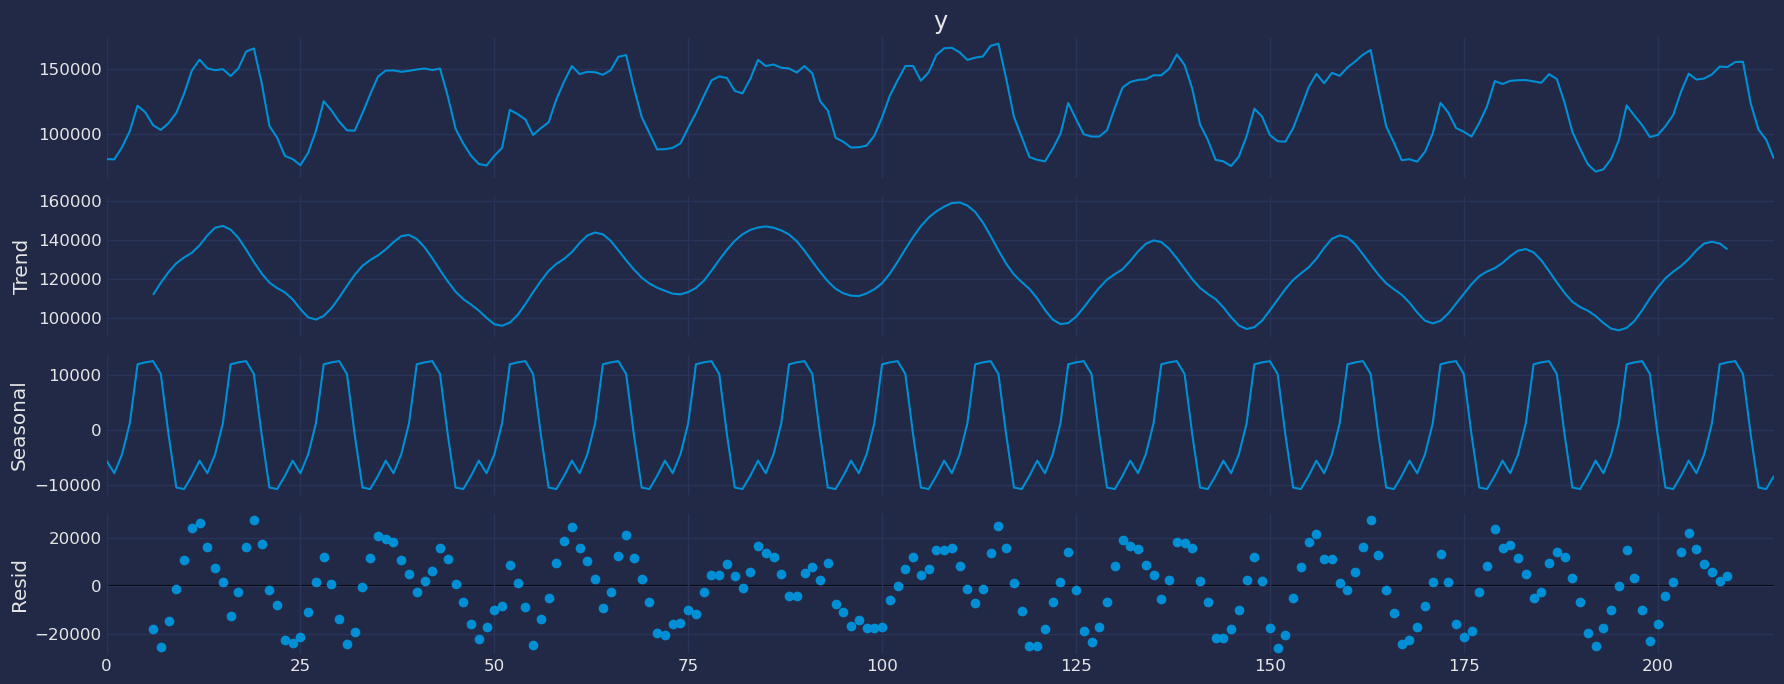

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "additive", period=12)
a.plot();

### Multiplicative

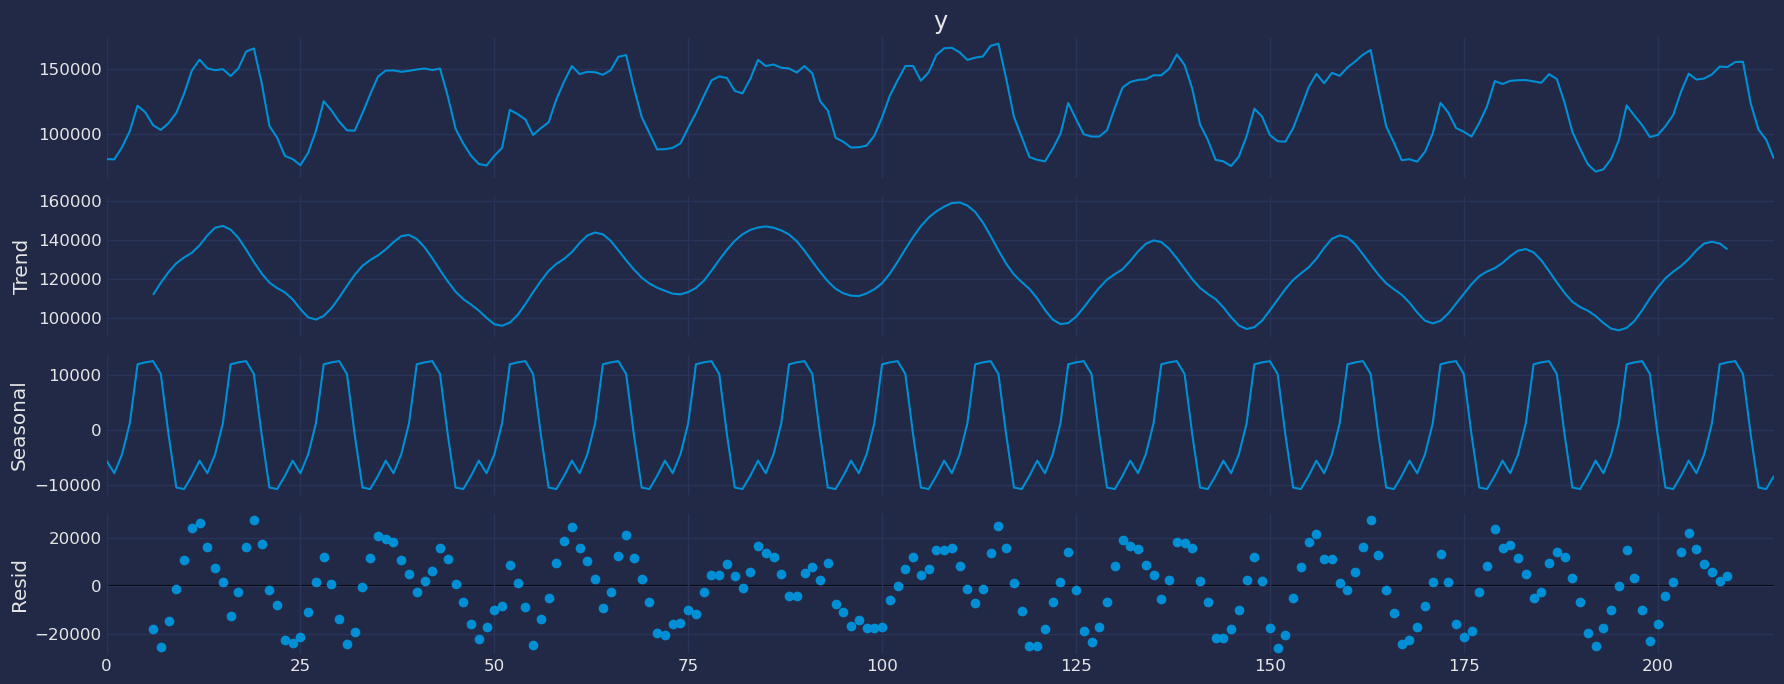

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "Multiplicative", period=12)
a.plot();

# **6. Split the data into training and testing** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our `Seasonal Exponential Smoothing Model`.
2. Data to test our model

For the test data we will use the last 12 months to test and evaluate the performance of our model.

In [12]:
train = df[df.ds<='2017-09-20 17:00:00'] 
test = df[df.ds>'2017-09-20 17:00:00'] 

In [13]:
train.shape, test.shape

((186, 3), (30, 3))

Now let's plot the training data and the test data.

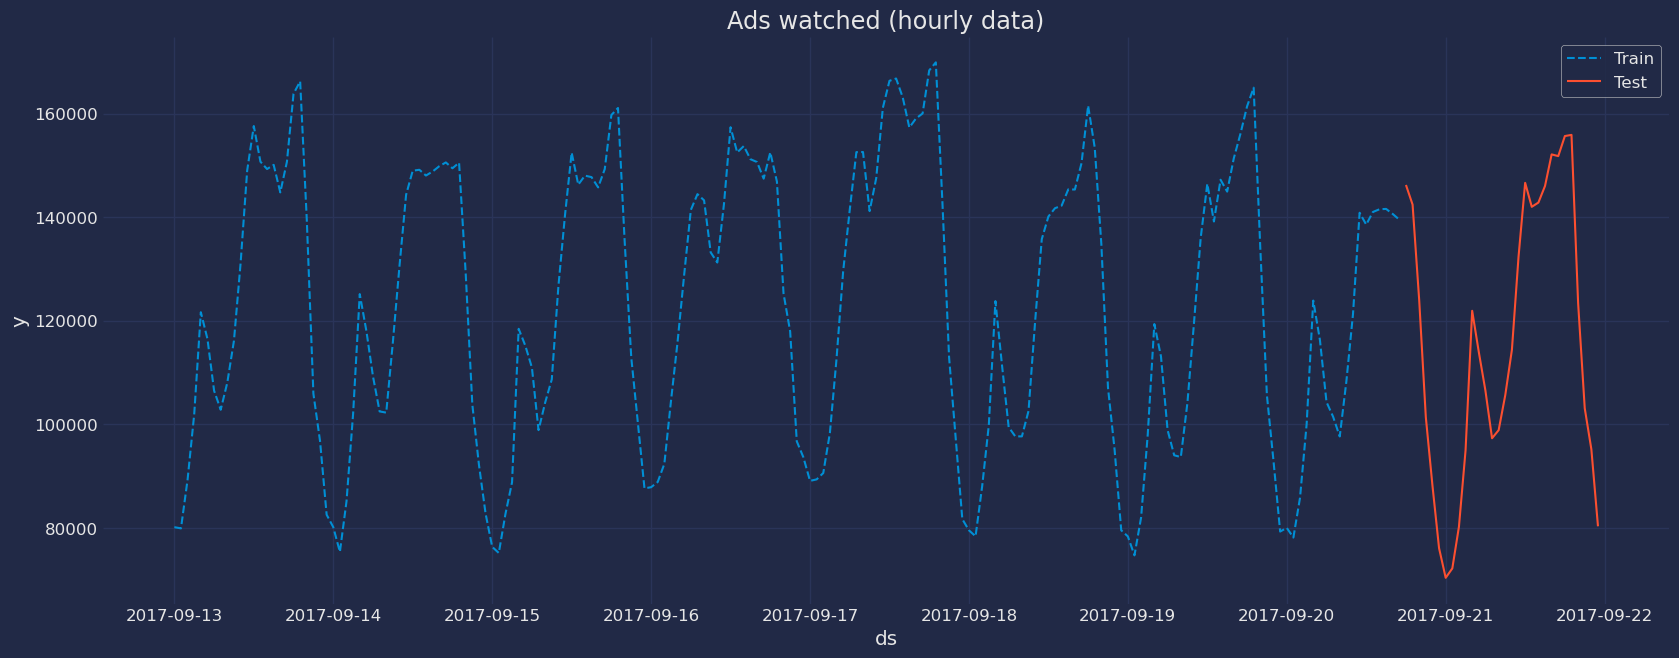

In [14]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.title("Ads watched (hourly data)");
plt.show()

# **7. Implementation of `Seasonal Exponential Smoothing Model` with StatsForecast** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

To also know more about the parameters of the functions of the `Seasonal Exponential Smoothing` you can see it [here](https://nixtla.github.io/statsforecast/src/core/models.html#seasonalsmooth).

## **7.1 Load libraries**

In [15]:
from statsforecast import StatsForecast
from statsforecast.models import SeasonalExponentialSmoothing

In [16]:
?SeasonalExponentialSmoothing

Init signature:
SeasonalExponentialSmoothing(
    season_length: int,
    alpha: float,
    alias: str = 'SeasonalES',
)
Docstring:     
SeasonalExponentialSmoothing model.

Uses a weighted average of all past observations where the weights decrease exponentially into the past.
Suitable for data with no clear trend or seasonality.
Assuming there are $t$ observations and season $s$, the one-step forecast is given by:
$\hat{y}_{t+1,s} = \alpha y_t + (1-\alpha) \hat{y}_{t-1,s}$

**Note:**<br>
This method is an extremely simplified of Holt-Winter's method where the trend and level are set to zero.
And a single seasonal smoothing parameter $\alpha$ is shared across seasons.

**References:**<br>
[Charles. C. Holt (1957). "Forecasting seasonals and trends by exponentially weighted moving averages", ONR Research Memorandum, Carnegie Institute of Technology 52.](https://www.sciencedirect.com/science/article/abs/pii/S0169207003001134).

[Peter R. Winters (1960). "Forecasting sales by exponential

## **7.2 Building Model**
Import and instantiate the models. Setting the argument is sometimes tricky. This article on [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/) by the master, Rob Hyndmann, can be useful for `season_length`.


In [17]:
season_length = 24 # Hourly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [SeasonalExponentialSmoothing(alpha=0.8, season_length=season_length)]

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [18]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(df=df,
                   models=models,
                   freq='H', 
                   n_jobs=-1)

## **7.3 Fit the Model**

In [19]:
# fit the models
sf.fit()

StatsForecast(models=[SeasonalES])

Let's see the results of our `Seasonal Exponential Smoothing Model`. We can observe it with the following instruction:

In [20]:
result=sf.fitted_[0,0].model_
result

{'mean': array([ 72221.8  ,  73250.41 ,  81213.68 ,  95889.06 , 122141.46 ,
        114311.9  , 105907.24 ,  97934.02 ,  98570.34 , 106042.58 ,
        115734.17 , 133876.25 , 145319.06 , 141776.67 , 142775.06 ,
        145288.16 , 150219.11 , 149963.72 , 154389.11 , 154027.47 ,
        123923.64 , 102927.42 ,  93966.52 ,  79575.586], dtype=float32),
 'fitted': array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,  80115.   ,
         79885.   ,  89325.   , 101930.   , 121630.   , 116475.   ,
        106495.   , 102795.   , 108055.   , 116125.   , 131030.   ,
        149020.   , 157590.   , 150715.   , 149295.   , 150100.   ,
        144780.   , 150690.   , 163840.   , 166235.   , 139520.   ,
        105895.   ,  9678

Let us now visualize the fitted values of our models.

As we can see, the result obtained above has an output in a dictionary, to extract each element from the dictionary we are going to use the `.get()` function to extract the element and then we are going to save it in a `pd.DataFrame()`.

In [21]:
fitted=pd.DataFrame(result.get("fitted"), columns=["fitted"])
fitted["ds"]=df["ds"]
fitted

,fitted,ds
0,NaN,2017-09-13 00:00:00
1,NaN,2017-09-13 01:00:00
2,NaN,2017-09-13 02:00:00
3,NaN,2017-09-13 03:00:00
4,NaN,2017-09-13 04:00:00
...,...,...
211,146577.312500,2017-09-21 19:00:00
212,126038.187500,2017-09-21 20:00:00
213,102317.117188,2017-09-21 21:00:00
214,89212.632812,2017-09-21 22:00:00


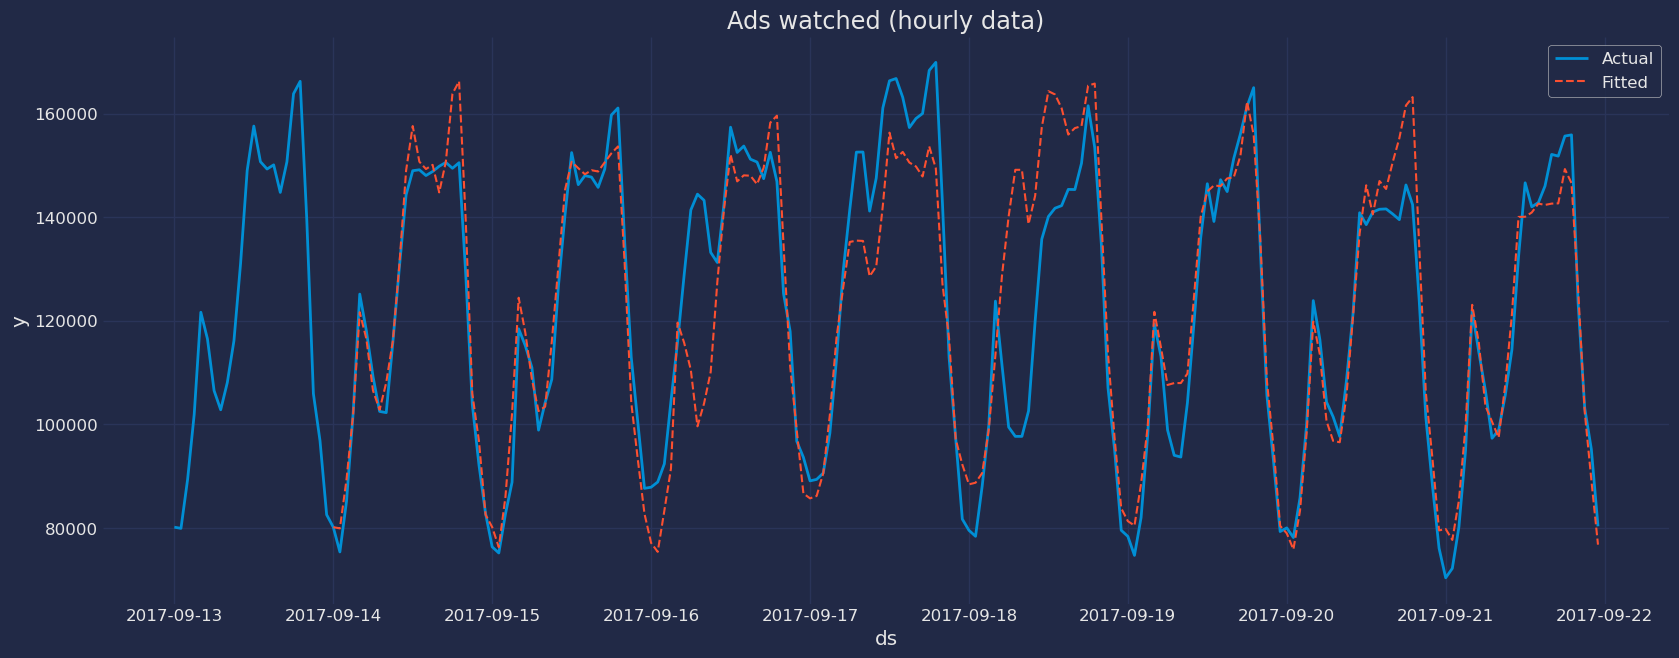

In [22]:
sns.lineplot(df, x="ds", y="y", label="Actual", linewidth=2)
sns.lineplot(fitted,x="ds", y="fitted", label="Fitted", linestyle="--" )

plt.title("Ads watched (hourly data)");
plt.show()

## **7.4 Forecast Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 12 months ahead.

* `level (list of floats):` this optional parameter is used for probabilistic forecasting. Set the level (or confidence percentile) of your prediction interval. For example, `level=[90]` means that the model expects the real value to be inside that interval 90% of the times.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [23]:
# Prediction
Y_hat = sf.forecast(horizon, fitted=True)

Y_hat

,ds,SeasonalES
unique_id,,
1,2017-09-22 00:00:00,72221.796875
1,2017-09-22 01:00:00,73250.406250
1,2017-09-22 02:00:00,81213.679688
1,2017-09-22 03:00:00,95889.062500
1,2017-09-22 04:00:00,122141.460938
1,2017-09-22 05:00:00,114311.898438
1,2017-09-22 06:00:00,105907.242188
1,2017-09-22 07:00:00,97934.023438
1,2017-09-22 08:00:00,98570.343750


In [24]:
values=sf.forecast_fitted_values()
values.head()

,ds,y,SeasonalES
unique_id,,,
1,2017-09-13 00:00:00,80115.0,NaN
1,2017-09-13 01:00:00,79885.0,NaN
1,2017-09-13 02:00:00,89325.0,NaN
1,2017-09-13 03:00:00,101930.0,NaN
1,2017-09-13 04:00:00,121630.0,NaN


In [25]:
StatsForecast.plot(values)

Adding 95% confidence interval with the forecast method

In [ ]:
sf.forecast(h=horizon)

In [84]:
test

,ds,y,unique_id
186,2017-09-20 18:00:00,11.892833,1
187,2017-09-20 19:00:00,11.866571,1
188,2017-09-20 20:00:00,11.727593,1
189,2017-09-20 21:00:00,11.526434,1
190,2017-09-20 22:00:00,11.387022,1
191,2017-09-20 23:00:00,11.239146,1
192,2017-09-21 00:00:00,11.161025,1
193,2017-09-21 01:00:00,11.186503,1
194,2017-09-21 02:00:00,11.292216,1
195,2017-09-21 03:00:00,11.461053,1


In [26]:
Y_hat=Y_hat.reset_index()
Y_hat

,unique_id,ds,SeasonalES
0,1,2017-09-22 00:00:00,72221.796875
1,1,2017-09-22 01:00:00,73250.406250
2,1,2017-09-22 02:00:00,81213.679688
3,1,2017-09-22 03:00:00,95889.062500
4,1,2017-09-22 04:00:00,122141.460938
5,1,2017-09-22 05:00:00,114311.898438
6,1,2017-09-22 06:00:00,105907.242188
7,1,2017-09-22 07:00:00,97934.023438
8,1,2017-09-22 08:00:00,98570.343750
9,1,2017-09-22 09:00:00,106042.578125


In [27]:
# Merge the forecasts with the true values
#Y_hat1 = df.merge(Y_hat, how='left', on=['unique_id'])
Y_hat1= pd.concat([df,Y_hat])
Y_hat1

,ds,y,unique_id,SeasonalES
0,2017-09-13 00:00:00,80115.0,1,NaN
1,2017-09-13 01:00:00,79885.0,1,NaN
2,2017-09-13 02:00:00,89325.0,1,NaN
3,2017-09-13 03:00:00,101930.0,1,NaN
4,2017-09-13 04:00:00,121630.0,1,NaN
...,...,...,...,...
25,2017-09-23 01:00:00,NaN,1,73250.406250
26,2017-09-23 02:00:00,NaN,1,81213.679688
27,2017-09-23 03:00:00,NaN,1,95889.062500
28,2017-09-23 04:00:00,NaN,1,122141.460938


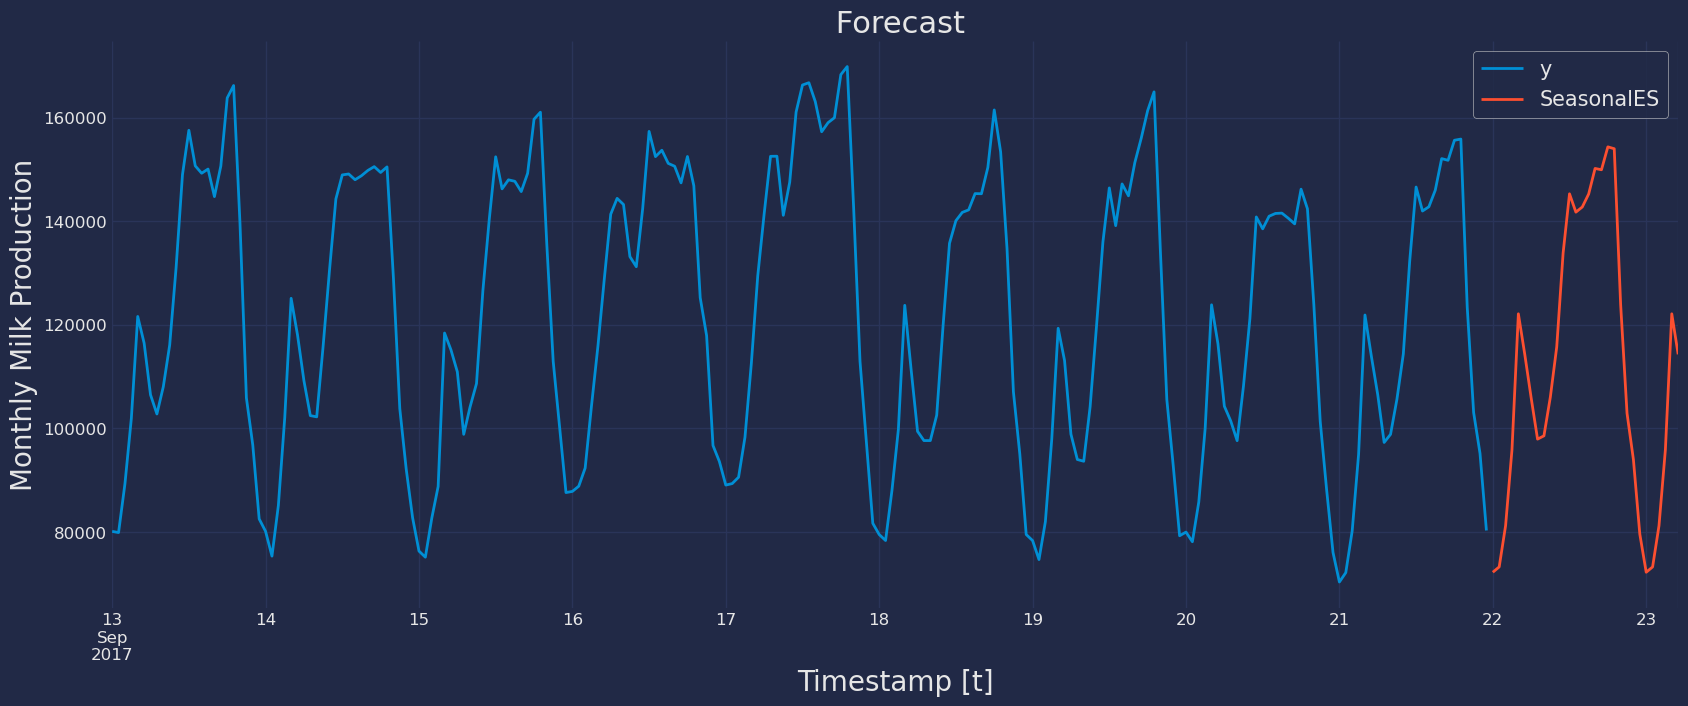

In [28]:
# Merge the forecasts with the true values


fig, ax = plt.subplots(1, 1)
plot_df = pd.concat([df,Y_hat]).set_index('ds')
plot_df[['y', "SeasonalES"]].plot(ax=ax, linewidth=2)
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Monthly Milk Production', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid(True)

## **7.5 Predict method with confidence interval**

To generate forecasts use the predict method.

The predict method takes two arguments: forecasts the next `h` (for horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 12 months ahead.

* `level (list of floats):` this optional parameter is used for probabilistic forecasting. Set the level (or confidence percentile) of your prediction interval. For example, `level=[95]` means that the model expects the real value to be inside that interval 95% of the times.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals.

This step should take less than 1 second.

In [39]:
sf.predict(h=horizon) 

,ds,SeasonalES
unique_id,,
1,2017-09-22 00:00:00,11.186183
1,2017-09-22 01:00:00,11.201158
1,2017-09-22 02:00:00,11.304498
1,2017-09-22 03:00:00,11.470751
1,2017-09-22 04:00:00,11.712904
1,2017-09-22 05:00:00,11.646641
1,2017-09-22 06:00:00,11.570130
1,2017-09-22 07:00:00,11.491736
1,2017-09-22 08:00:00,11.498311


In [29]:
forecast_df = sf.predict(h=horizon) 

forecast_df

,ds,SeasonalES
unique_id,,
1,2017-09-22 00:00:00,72221.796875
1,2017-09-22 01:00:00,73250.406250
1,2017-09-22 02:00:00,81213.679688
1,2017-09-22 03:00:00,95889.062500
1,2017-09-22 04:00:00,122141.460938
1,2017-09-22 05:00:00,114311.898438
1,2017-09-22 06:00:00,105907.242188
1,2017-09-22 07:00:00,97934.023438
1,2017-09-22 08:00:00,98570.343750


We can join the forecast result with the historical data using the pandas function `pd.concat()`, and then be able to use this result for graphing.

In [30]:
df_plot= pd.concat([df, forecast_df]).set_index('ds')
df_plot

,y,unique_id,SeasonalES
ds,,,
2017-09-13 00:00:00,80115.0,1,NaN
2017-09-13 01:00:00,79885.0,1,NaN
2017-09-13 02:00:00,89325.0,1,NaN
2017-09-13 03:00:00,101930.0,1,NaN
2017-09-13 04:00:00,121630.0,1,NaN
...,...,...,...
2017-09-23 01:00:00,NaN,NaN,73250.406250
2017-09-23 02:00:00,NaN,NaN,81213.679688
2017-09-23 03:00:00,NaN,NaN,95889.062500


Now let's visualize the result of our forecast and the historical data of our time series, also let's draw the confidence interval that we have obtained when making the prediction with 95% confidence.

In [87]:
def plot_forecasts(y_hist, y_true, y_pred, models):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    df_plot = pd.concat([y_hist, y_true]).set_index('ds').tail(12*10)
    df_plot[['y'] + models].plot(ax=ax, linewidth=3 , )
    colors = ['green', "lime"]
  # Specify graph features:
    ax.fill_between(df_plot.index, 
                df_plot['DynamicOptimizedTheta-lo-80'], 
                df_plot['DynamicOptimizedTheta-lo-80'],
                alpha=.20,
                color='orange',
                label='DynamicOptimizedTheta_level_80')
    ax.fill_between(df_plot.index, 
                df_plot['DynamicOptimizedTheta-lo-95'], 
                df_plot['DynamicOptimizedTheta-hi-95'],
                alpha=.3,
                color='lime',
                label='DynamicOptimizedTheta_level_95')
    ax.set_title('', fontsize=22)
    ax.set_ylabel("Montly Mil Production", fontsize=20)
    ax.set_xlabel('Month-Days', fontsize=20)
    ax.legend(prop={'size': 20})
    ax.grid(True)
    plt.show()

KeyError: 'DynamicOptimizedTheta-lo-80'

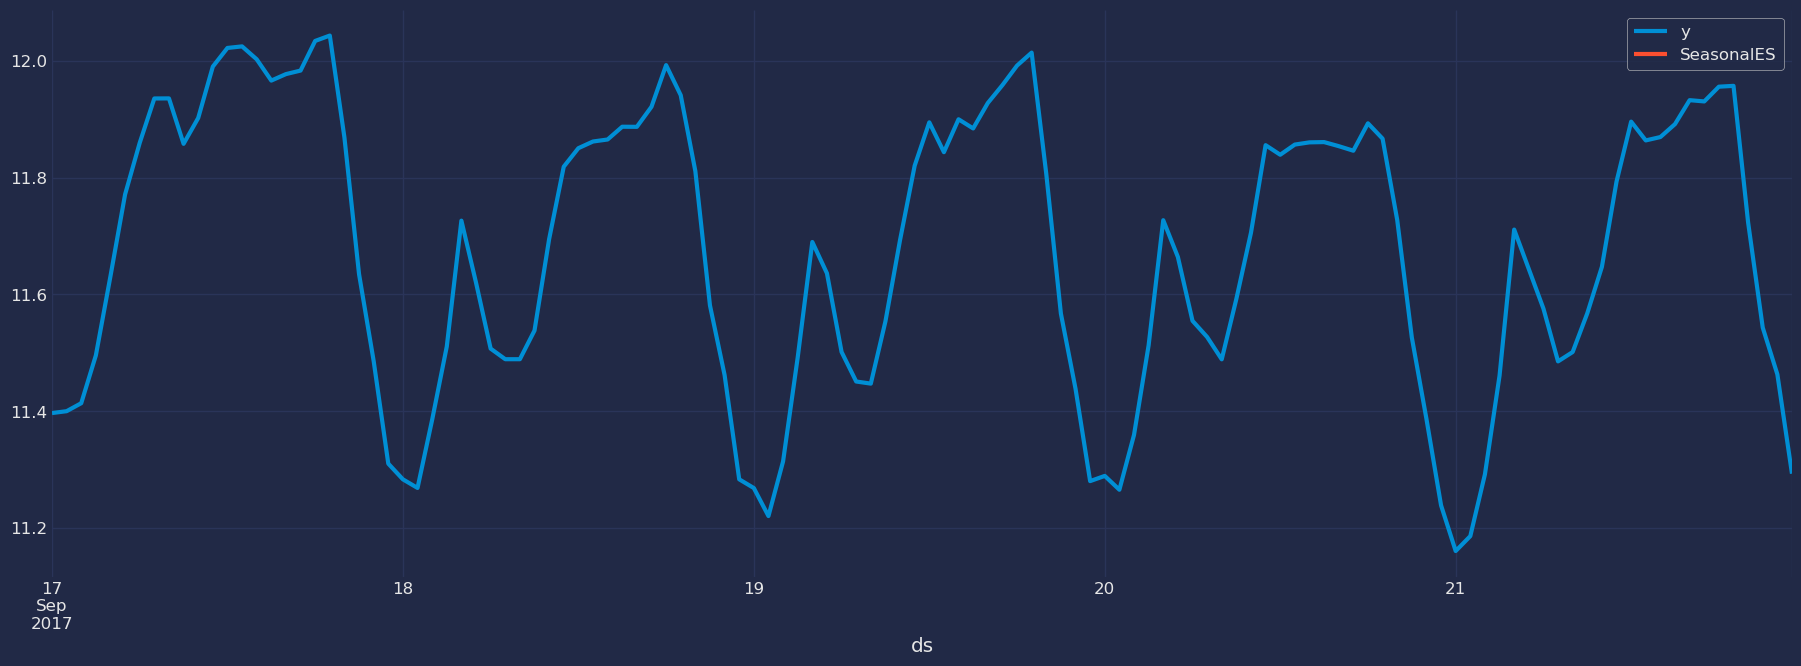

In [88]:
plot_forecasts(train, test, forecast_df, models=['SeasonalES'])

Let's plot the same graph using the plot function that comes in `Statsforecast`, as shown below.

In [32]:
sf.plot(df, forecast_df)

# **8. Evaluate the model’s performance** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In previous steps, we’ve taken our historical data to predict the future. However, to asses its accuracy we would also like to know how the model would have performed in the past. To assess the accuracy and robustness of your models on your data perform Cross-Validation.

With time series data, Cross Validation is done by defining a sliding window across the historical data and predicting the period following it. This form of cross-validation allows us to arrive at a better estimation of our model’s predictive abilities across a wider range of temporal instances while also keeping the data in the training set contiguous as is required by our models.

The following graph depicts such a Cross Validation Strategy:

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

## **8.1 Perform time series cross-validation**

Cross-validation of time series models is considered a best practice but most implementations are very slow. The statsforecast library implements cross-validation as a distributed operation, making the process less time-consuming to perform. If you have big datasets you can also perform Cross Validation in a distributed cluster using Ray, Dask or Spark.

In this case, we want to evaluate the performance of each model for the last 5 months `(n_windows=5)`, forecasting every second months `(step_size=12)`. Depending on your computer, this step should take around 1 min.

The cross_validation method from the StatsForecast class takes the following arguments.

* `df:` training data frame

* `h (int):` represents h steps into the future that are being forecasted. In this case, 12 months ahead.

* `step_size (int):` step size between each window. In other words: how often do you want to run the forecasting processes.

* `n_windows(int):` number of windows used for cross validation. In other words: what number of forecasting processes in the past do you want to evaluate.

In [33]:
crossvalidation_df = sf.cross_validation(df=df,
                                         h=horizon,
                                         step_size=12,
                                         n_windows=3)

The crossvaldation_df object is a new data frame that includes the following columns:

*  `unique_id:` index. If you dont like working with index just run crossvalidation_df.resetindex()
* `ds:` datestamp or temporal index
* `cutoff:` the last datestamp or temporal index for the n_windows.
* `y:` true value
* `"model":` columns with the model’s name and fitted value.

In [34]:
crossvalidation_df

,ds,cutoff,y,SeasonalES
unique_id,,,,
1,2017-09-19 18:00:00,2017-09-19 17:00:00,161385.0,78924.984375
1,2017-09-19 19:00:00,2017-09-19 17:00:00,165010.0,75820.210938
1,2017-09-19 20:00:00,2017-09-19 17:00:00,134090.0,83301.921875
1,2017-09-19 21:00:00,2017-09-19 17:00:00,105585.0,98286.570312
1,2017-09-19 22:00:00,2017-09-19 17:00:00,92855.0,119816.468750
...,...,...,...,...
1,2017-09-21 19:00:00,2017-09-20 17:00:00,155890.0,77652.039062
1,2017-09-21 20:00:00,2017-09-20 17:00:00,123395.0,85288.382812
1,2017-09-21 21:00:00,2017-09-20 17:00:00,103080.0,99665.312500


We’ll now plot the forecast for each cutoff period. To make the plots clearer, we’ll rename the actual values in each period.

In [35]:
crossvalidation_df.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 

cutoff = crossvalidation_df['cutoff'].unique()

for k in range(len(cutoff)): 
    cv = crossvalidation_df[crossvalidation_df['cutoff'] == cutoff[k]]
    StatsForecast.plot(df, cv.loc[:, cv.columns != 'cutoff'])

# **9. Evaluate the model** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

We can now compute the accuracy of the forecast using an appropiate accuracy metric. Here we’ll use the Root Mean Squared Error (RMSE). To do this, we first need to `install datasetsforecast`, a Python library developed **by Nixtla** that includes a function to compute the RMSE.

`pip install datasetsforecast`

In [36]:
from datasetsforecast.losses import rmse

The function to compute the RMSE takes two arguments:

1. The actual values.
2. The forecasts, in this case, `Seasonal Exponential Smoothing Model`.

In [37]:
rmse = rmse(crossvalidation_df['actual'], crossvalidation_df["SeasonalES"])
print("RMSE using cross-validation: ", rmse)

RMSE using cross-validation:  39997.44


As you have noticed, we have used the cross validation results to perform the evaluation of our model.

Now we are going to evaluate our model with the results of the predictions, we will use different types of metrics  `MAE, MAPE, MASE, RMSE, SMAPE` to evaluate the `accuracy`.

In [ ]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)

In [ ]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values, 
                                                 y_true[model].values, 
                                                 y_hist['y'].values, seasonality=12)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [ ]:
evaluate_performace(train, test, Y_hat, models=["SeasonalES"])

# **10. References** <a class="anchor" id="10"></a>

[Table of Contents](#0)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#arch-model).
5. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
7. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).


